<a href="https://colab.research.google.com/github/Rohu0903/Parkinson/blob/main/Breast_Cancer_Detection_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving breast-cancer.csv to breast-cancer (1).csv


In [ ]:
dataset = pd.read_csv('breast-cancer.csv')

In [ ]:
print(dataset.shape)
print(dataset.head(5))

(569, 32)
         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_worst

Mapping Class String Values to Numbers

In [ ]:
dataset['diagnosis']= dataset['diagnosis'].map({'B':0,'M':1}).astype(int)
#this line of code is transforming the data in a column called 'diagnosis' in a dataset:
#Mapping Values: It replaces specific text values with numbers. Here, 'B' (which might stand for "benign") is replaced with 0, and 'M' (which might stand for "malignant") is replaced with 1.
#Changing Data Type: After replacing the text with numbers, it converts the data in the 'diagnosis' column to integers.
#So, if you had a column with values like 'B', 'M', 'B', the code changes it to 0, 1, 0. This process helps in making the data easier to analyze, especially for machine learning algorithms.
print(dataset.head)

<bound method NDFrame.head of            id  diagnosis  radius_mean  texture_mean  perimeter_mean  \
0      842302          1        17.99         10.38          122.80   
1      842517          1        20.57         17.77          132.90   
2    84300903          1        19.69         21.25          130.00   
3    84348301          1        11.42         20.38           77.58   
4    84358402          1        20.29         14.34          135.10   
..        ...        ...          ...           ...             ...   
564    926424          1        21.56         22.39          142.00   
565    926682          1        20.13         28.25          131.20   
566    926954          1        16.60         28.08          108.30   
567    927241          1        20.60         29.33          140.10   
568     92751          0         7.76         24.54           47.92   

     area_mean  smoothness_mean  compactness_mean  concavity_mean  \
0       1001.0          0.11840           0.2776

Segregate Dataset into X(Input Variable)& y(Output Variable)

In [ ]:
X = dataset.iloc[:,2:32].values
#Selecting Columns: 2:32 refers to the range of columns you're interested in. In this case, it's selecting columns from index 2 up to, but not including, index 32.
X

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [ ]:
Y = dataset.iloc[:,1].values
Y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

Splitting Dataset Into Train & Test

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size = 0.25, random_state = 0)
#test_size = 0.25: This means 25% of the data will be used for testing, and the remaining 75% will be used for training.
#random_state = 0: This ensures that the split is the same every time you run the code, which is useful for reproducibility.

Feature Scaling
              # we scale our data to make all the features contribute equally to the result
               #Fit_Transform-fit method is calculating the mean and variance of each of the features present in our data
              TRANSFORM - transform method is transforming all the features using the respective mean and variance,
              We want our test data to be a completely new and a surprise set of our model

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

 K NEAREST NEIGHBORS

  Let’s say you have a bunch of fruits and you want to classify a new fruit. You have data about various fruits, like their color, size, and weight, and which type of fruit they are (apple, orange, banana, etc.).

Step 1: You collect data on the new fruit (let's say it's small, red, and round).

Step 2: The KNeighborsClassifier algorithm will look at the data points of other fruits that are similar in size, color, and shape.

Step 3: It will find the 'k' closest fruits (neighbors) to your new fruit.

Step 4: It will classify the new fruit based on which type the majority of these closest fruits belong to.
 If most of the closest fruits are apples, then it will classify the new fruit as an apple.

**NAIVE BAYES**
Simple Explanation:

Imagine you’re a teacher trying to predict whether a student will pass or fail an exam based on their study habits and past performance. You have data about how many hours students studied and their grades in previous tests. Some students study more and tend to get higher grades, while others study less and usually get lower grades.

The GaussianNB classifier helps you make predictions by assuming that the study hours and past grades are distributed in a certain way (like a bell curve) and then uses this information to predict whether a new student will pass or fail.

**SVC**
Simple Explanation:
Imagine you are a teacher and you want to divide your students into two groups based on their performance. You have information on how much time they spend studying and their test scores. The goal is to draw a line (or boundary) that best separates students who perform well from those who don't.

**cross_val_score** is like giving your model multiple small tests instead of one big test, and

*** StratifiedKFold *** ensures that these tests are fair and balanced, especially when you have uneven or imbalanced classes (like more apples than oranges).

Real-Life Example:
  Evaluating a Student's Performance

  Imagine you’re a teacher, and you want to evaluate how well a student understands the material over a semester.

  Instead of just giving them one big final exam, you give them several smaller quizzes throughout the semester.

Importing Libraries:

1.*from sklearn.discriminant_analysis import LinearDiscriminantAnalysis*: Imports a method to classify data by finding a linear combination of features that best separates different classes.

2.*from sklearn.linear_model import LogisticRegression*: Imports a method for classification that predicts the probability of a class based on a linear relationship between features.

3.*from sklearn.tree import DecisionTreeClassifier*: Imports a method that classifies data using a tree-like model of decisions.

4.*from sklearn.neighbors import KNeighborsClassifier*: Imports a method that classifies data based on the majority class among its nearest neighbors.

5.*from sklearn.naive_bayes import GaussianNB*: Imports a method that uses probability theory to classify data, assuming features are normally distributed.

6.*from sklearn.svm import SVC*: Imports a method for classification that finds the best boundary (or "hyperplane") that separates different classes.

**Cross-Validation and Model Evaluation:**

1.*from sklearn.model_selection import cross_val_score*: Imports a function that evaluates the performance of a model by splitting the data into multiple parts, training on some parts, and testing on the remaining parts. It helps assess how well a model performs on unseen data.

2.*from sklearn.model_selection import StratifiedKFold*: Imports a tool to split the data into folds (or subsets) in such a way that each fold has a proportional representation of each class. This is useful for making sure that the evaluation is fair and reflects the class distribution.

In [ ]:
models=[]
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
#This line of code is adding a logistic regression model to a list of models:

#models.append: This adds an item to a list named models.

#('LR', LogisticRegression(solver='liblinear', multi_class='ovr')):

#'LR': This is a label or name for the model, which stands for Logistic Regression.
#LogisticRegression(solver='liblinear', multi_class='ovr'): This creates a logistic regression model with specific settings:
#solver='liblinear': Specifies the algorithm to use for finding the best parameters. 'liblinear' is good for small to medium-sized datasets.
#multi_class='ovr': Stands for "one-vs-rest," a strategy for handling multiple classes in classification problems.

LR:0.981285


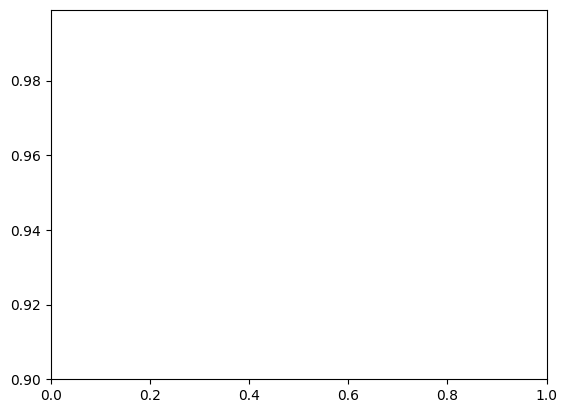

In [ ]:
results=[]
names=[]
res=[]
for name, model in models:
  kfold = StratifiedKFold(n_splits=10, random_state=None)
  cv_results = cross_val_score(model,X_train,y_train,cv=kfold, scoring='accuracy')
  results.append(cv_results)
  names.append(name)
  res.append(cv_results.mean())
  print('%s:%f' % (name, cv_results.mean()))

  pyplot.ylim(.900,.999)

**results, names, and res** are empty lists. These will store data as the code runs.
Loop Through Models:

The loop runs through a list of machine learning models. Each name is the name of a model (e.g., "Logistic Regression", "SVM"), and model is the actual algorithm.

**Cross-Validation:**

**StratifiedKFold** is a technique used to split the training data (X_train and y_train) into 10 equal parts (called "folds"). This ensures that each fold has the same proportion of each class (like ensuring each fold has a balanced number of yes/no labels in a classification task).

**cross_val_score** performs the model training and evaluation 10 times, each time using a different fold as the test set and the other 9 folds as the training set. The scoring='accuracy' parameter means it’s measuring how often the model correctly predicts the labels.

**Storing Results:**

**results.append(cv_results):** Adds the accuracy scores from the 10 folds to the results list.

**names.append(name):** Adds the name of the model to the names list.

**res.append(cv_results.mean()):** Calculates the average accuracy from the 10 folds and adds it to the res list.

**print('%s:%f' % (name, cv_results.mean())):** Prints the name of the model along with its average accuracy.
Setting Y-axis Limits:

**pyplot.ylim(.900, .999):** This line sets the vertical axis (y-axis) of the plot to range between 0.900 and 0.999. This means only accuracy values within this range will be shown on the plot.

In [ ]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
values=[12.45,15.7,82.57,477.1,0.1278,0.17,0.1578,0.08089,0.2087,0.07613,0.3345,0.8902,2.217,27.19,0.00751,0.03345,0.03672,0.01137,0.02165,0.005082,15.47,23.75,103.4,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.1244]
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

[[1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]

Importing and Initializing the Model:

from sklearn.linear_model import LogisticRegression: This imports the LogisticRegression model from the sklearn library.

model = LogisticRegression(): This creates an instance of the LogisticRegression model, which is a type of algorithm used for classification tasks.

Sample Data:

values = [...]: This is a list of numerical values representing some features of a single data point. These features might be measurements or characteristics used to make predictions.

Training the Model:

model.fit(X_train, y_train): The fit method trains the LogisticRegression model using the training data (X_train for the features and y_train for the corresponding labels).

Making Predictions:

y_pred = model.predict(X_test): After training, the model is used to predict the labels (or outcomes) for the test data (X_test).

Comparing Predictions to Actual Labels:

print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)), 1)): This line of code is printing a side-by-side comparison of the predicted labels (y_pred) and the actual labels (y_test).

Here's what happens in this line:

y_pred.reshape(len(y_pred), 1) and y_test.reshape(len(y_test), 1) reshape the arrays of predicted and actual labels into column vectors (so they each become a single column with multiple rows).
np.concatenate(..., 1) combines these two columns side by side, creating a matrix where each row shows the predicted label and the actual label for the same data point.
print(...) outputs this comparison to the console.